# Totally Accurate Warhammer Simulator

Inspired by the question, "What's the better value? A unit of 10 Liberators with paired Hammers at 200 points or a unit of 5 Retributors at 220 points?"

The real answer is, of course, it depends. 

Can all your Liberators get into combat? But you can't take 2.5 Retributors into combat for 110 points either.

But we're ignoring all that and having fun!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from battletome.stormcast import Liberator

## Liberator vs Liberator

### Hammer and Shield vs Paired Hammers

In [3]:
hammer_and_shield = Liberator()
print(hammer_and_shield.describe())

Liberator (Warhammer and Sigmarite Shield) [2/2]
A:2, H:4+, W:3+, R:-, D:1


In [4]:
paired_hammers = Liberator(has_paired=True)
print(paired_hammers.describe())

Liberator (Paired Warhammers) [2/2]
A:2, H:4+, W:3+, R:-, D:1


Comparing the damage output distribution of Units of size 20, each fully composed of 1 type of Liberator

In [5]:
UNIT_STRENGTH = 20
SIMULATIONS = 100000
max_damage = UNIT_STRENGTH*2+1

data = pd.concat([pd.DataFrame({"damage": range(max_damage),
                                "frequency": np.bincount(hammer_and_shield.attack(UNIT_STRENGTH, size=SIMULATIONS), 
                                                         minlength=max_damage),
                                "unit": "Hammer and Shield"}),
                  pd.DataFrame({"damage": range(max_damage),
                                "frequency": np.bincount(paired_hammers.attack(UNIT_STRENGTH, size=SIMULATIONS), 
                                                         minlength=max_damage),
                                "unit": "Paired Hammers"})])
print(len(data))
data[:3]

82


,damage,frequency,unit
0,0,68,Hammer and Shield
1,1,533,Hammer and Shield
2,2,2044,Hammer and Shield


Text(0.5, 1.0, 'Comparing Damage of Hammer and Shield vs Paired Hammers\nUnits of 20, Save 4+, No Tyrant')

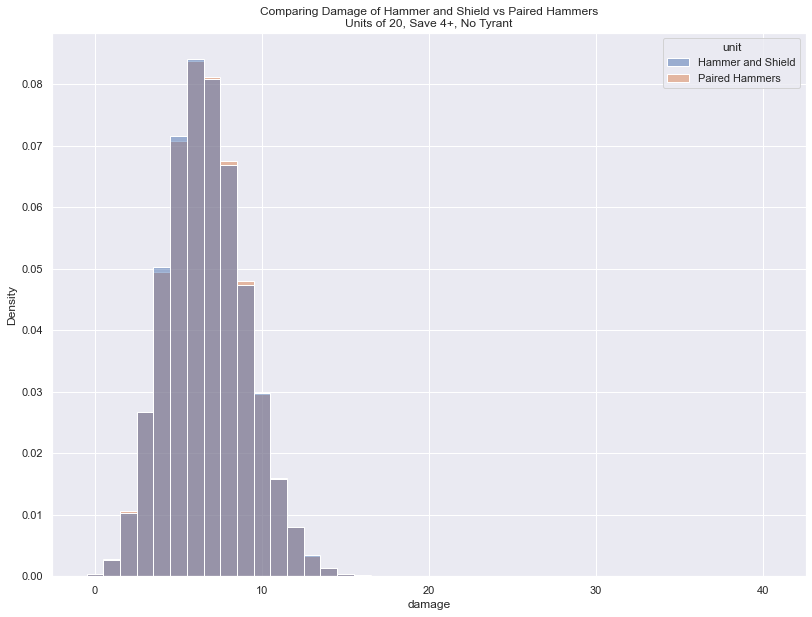

In [6]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 10)
sns.histplot(data=data, x="damage", hue="unit", weights="frequency", bins=13, discrete=True, stat="density")
ax.set_title("Comparing Damage of Hammer and Shield vs Paired Hammers\n"
             "Units of 20, Save 4+, No Tyrant")

Interestingly, paired weapons, which reroll hits of 1, aren't really better than a hammer and shield.

In [7]:
(data
 .assign(total=lambda df: df["damage"]*df["frequency"])
 .groupby("unit")
 [["frequency", "total"]]
 .sum()
 .assign(expected_damage=lambda df: df["total"]/df["frequency"])
 ["expected_damage"])

unit
Hammer and Shield    6.66990
Paired Hammers       6.67328
Name: expected_damage, dtype: float64

### Hammers vs Swords

Are the implements of Sigmar worth using or should they be tossed aside for cold steel

In [8]:
paired_hammers = Liberator(has_paired=True)
print(paired_hammers.describe())

Liberator (Paired Warhammers) [2/2]
A:2, H:4+, W:3+, R:-, D:1


In [9]:
paired_blades = Liberator(weapon=1, has_paired=True)
print(paired_blades.describe())

Liberator (Paired Warblades) [2/2]
A:2, H:3+, W:4+, R:-, D:1


In [10]:
UNIT_STRENGTH = 20
SIMULATIONS = 100000
max_damage = UNIT_STRENGTH*2+1

data = pd.concat([pd.DataFrame({"damage": range(max_damage),
                                "frequency": np.bincount(paired_hammers.attack(UNIT_STRENGTH, size=SIMULATIONS), 
                                                         minlength=max_damage),
                                "unit": "Paired Hammers"}),
                  pd.DataFrame({"damage": range(max_damage),
                                "frequency": np.bincount(paired_blades.attack(UNIT_STRENGTH, size=SIMULATIONS), 
                                                         minlength=max_damage),
                                "unit": "Paired Blades"})])
print(len(data))
data[:3]

82


,damage,frequency,unit
0,0,87,Paired Hammers
1,1,539,Paired Hammers
2,2,2147,Paired Hammers


Text(0.5, 1.0, 'Comparing Damage of Paired Hammers and Paired Blades\nUnits of 20, Save 4+, No Tyrant')

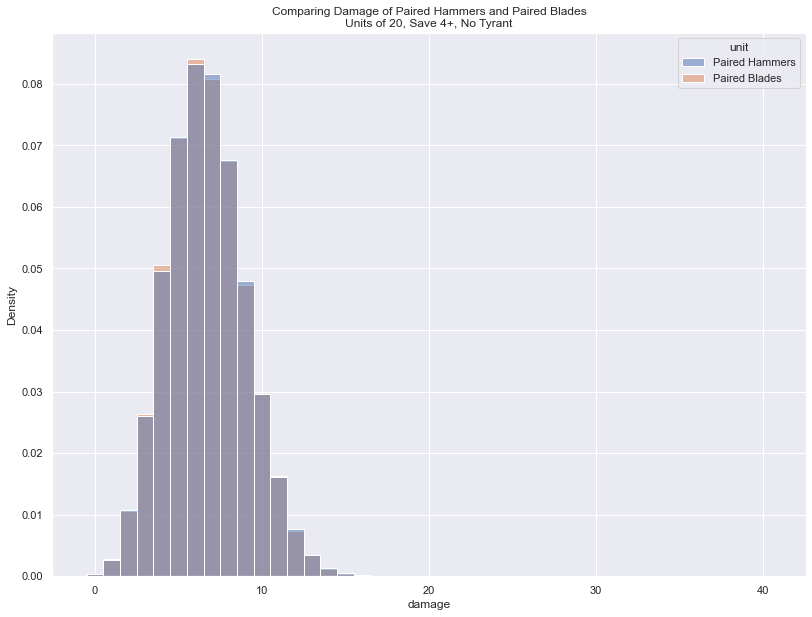

In [11]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 10)
sns.histplot(data=data, x="damage", hue="unit", weights="frequency", bins=13, discrete=True, stat="density")
ax.set_title("Comparing Damage of Paired Hammers and Paired Blades\n"
             "Units of 20, Save 4+, No Tyrant")

Once again, no real difference between the two

In [12]:
(data
 .assign(total=lambda df: df["damage"]*df["frequency"])
 .groupby("unit")
 [["frequency", "total"]]
 .sum()
 .assign(expected_damage=lambda df: df["total"]/df["frequency"])
 ["expected_damage"])

unit
Paired Blades     6.66462
Paired Hammers    6.67877
Name: expected_damage, dtype: float64